# Linear Regression 

Linear regression is a popular technique for forecasting air pollution levels. In this approach, the historical data on air pollution levels are used to identify a trend line that best predicts future values. This trend line can then be used to forecast future pollution levels.

for the prediction we used in data/data_prep_reg.csv the statistic values of the features: f.e:
for temperature : 
- max: max value
- min: min value
- mean: mean value
- std: standard deviation
- var: variation
- median: median value
- ptp: peak to peak

In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

# Set figure stile and size for entire notebook
sns.set_context('talk', font_scale=1)
plt.style.use(['dark_background'])

sns.set_context('talk')
plt.style.use(['dark_background'])

plt.rcParams.update({'font.sans-serif':'Helvetica'})


In [2]:
# Import Data

data = pd.read_csv('data/data_prep_reg.csv', index_col=[0]) # includes the statistics of the features only location D
#data = pd.read_csv('data/data_prep_feat.csv', index_col=[0]) # includes all values as a new features only location D
#data = pd.read_csv('data/data_prep_reg_all.csv', index_col=[0]) # include the statistics of the features an all locations

print(f'Data: {data.shape}')


Data: (4990, 44)


fill the nan values with the mean

In [3]:
#fillna
data = data.fillna(data.mean())

In [4]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.533776,0.840833,3.285000,90.986667,90.211667,90.624814,0.179998,0.032399,90.641667,0.775000
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.195908,0.627500,1.705000,90.744167,90.102500,90.454477,0.149374,0.022312,90.471667,0.641667
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.124645,0.625000,1.608333,90.873333,90.284167,90.607307,0.139059,0.019337,90.620833,0.589167
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.186272,0.678333,2.197500,91.004167,90.217500,90.600544,0.172882,0.029888,90.600833,0.786667


In [5]:
columns_to_drop = ['target', 'location']

# define features and target for regression
X = data.drop(columns_to_drop, axis=1)
y = data.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape} \t split into: Train: {X_train.shape} \t and Test: {X_test.shape}')
print (f'y: {y.shape} \t split into: Train: {y_train.shape} \t and Test: {y_test.shape}')


X: (4990, 42) 	 split into: Train: (3493, 42) 	 and Test: (1497, 42)
y: (4990,) 	 split into: Train: (3493,) 	 and Test: (1497,)


## Linear Regression

In [6]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Instantiate our model 
lin_reg = LinearRegression()
lin_reg_scaled = LinearRegression()


# Train the model using our data
lin_reg.fit(X_train, y_train)
lin_reg_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [8]:
# predict
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

y_pred_train_scaled = lin_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = lin_reg_scaled.predict(X_test_scaled)

In [9]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
  
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-200, 350], [-200, 350], color="white")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-200, 350], [0,0], color="white")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")


In [10]:

# Error analyses RMSE
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

rsme_lin_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_lin_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_lin_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_lin_reg_test_scaled:.2f}')

RSME _ train: 25.79
RSME _ test: 28.03
RSME _ train_scaled: 25.72
RSME _ test_scaled: 27.93


In [11]:
# coeficient relevance
print(f' max coef: {max(lin_reg.coef_)}')
print(f' min coef: {min(abs(lin_reg.coef_))}')

 max coef: 1389.67173670915
 min coef: 1.326228016296227e-11


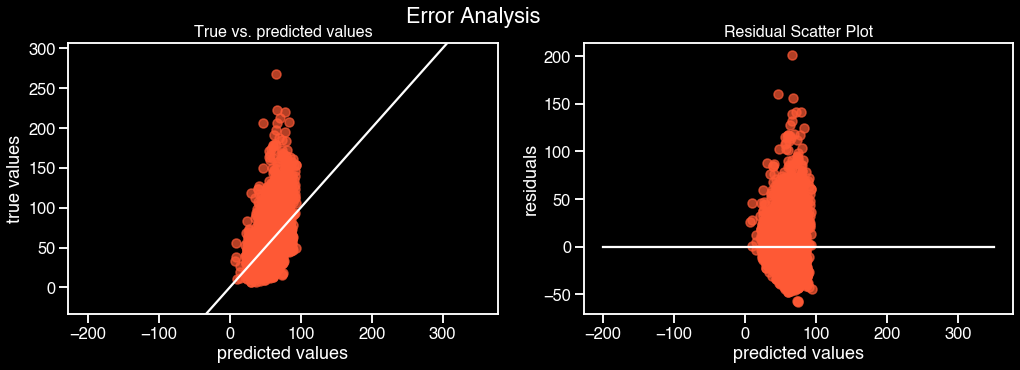

In [12]:
# error analysis train:
error_analysis(y_train, y_pred_train)

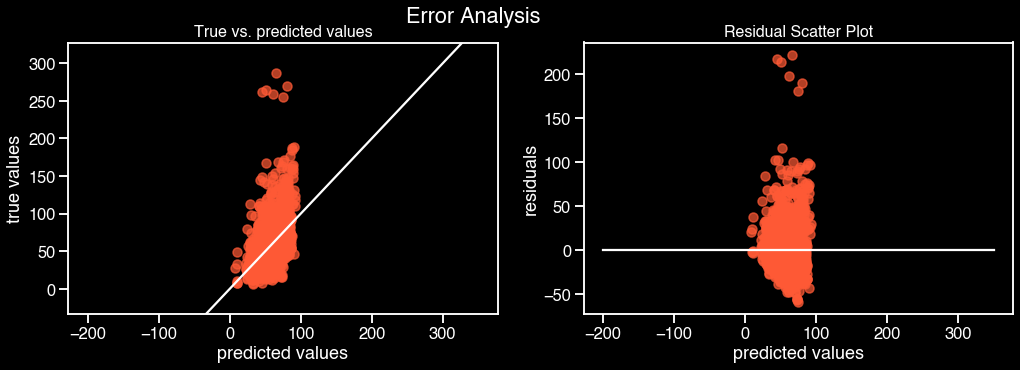

In [13]:
# error analysis test:
error_analysis(y_test, y_pred_test)

### Lasso
Lasso is similar to linear regression includes penalization

RSME _ train: 27.75
RSME _ test: 29.71


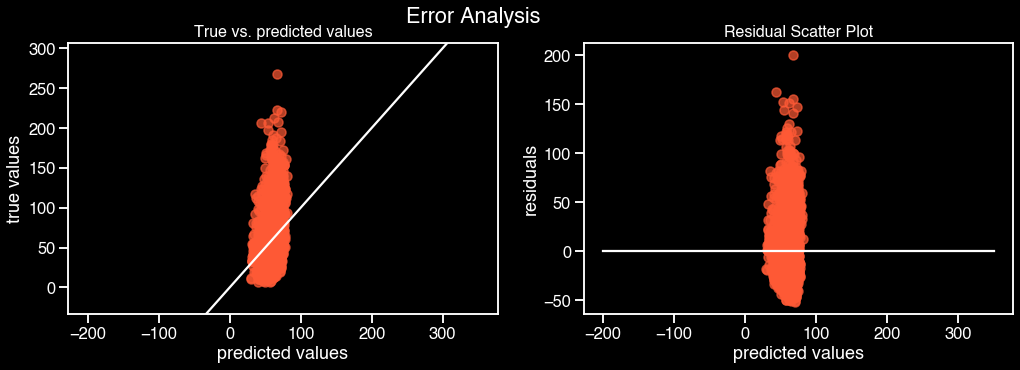

In [14]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)


In [15]:
print(f' max coef: {max(lasso_reg.coef_)}')
print(f' min coef: {min(lasso_reg.coef_)}')

 max coef: 3.6306192351473103
 min coef: -6.407678527278591


### Ridge


Similar to lasso it uses l2 penalization for the linear regression

RSME _ train: 26.13
RSME _ test: 28.22


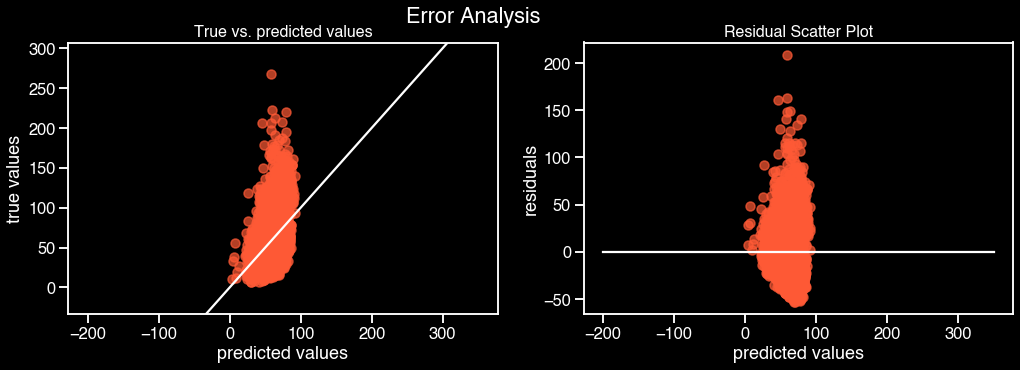

In [16]:
from sklearn.linear_model import Ridge

# Instantiate our model 
ridge_reg = Ridge()

# Train the model using our data
ridge_reg.fit(X_train, y_train)

# predict

y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

rsme_ridge_reg_train = rmse(y_train, y_pred_train)
rsme_ridge_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_ridge_reg_train:.2f}')
print(f'RSME _ test: {rsme_ridge_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

### Linear Regression with transformation of the target value: log y

In [17]:
y_log = np.log1p(y_train)


In [18]:
y_pred_train

array([55.90892317, 51.95155683, 43.10309784, ..., 74.15825716,
       54.85103365, 64.94297019])

RSME _ train: 26.19
RSME _ test: 28.38


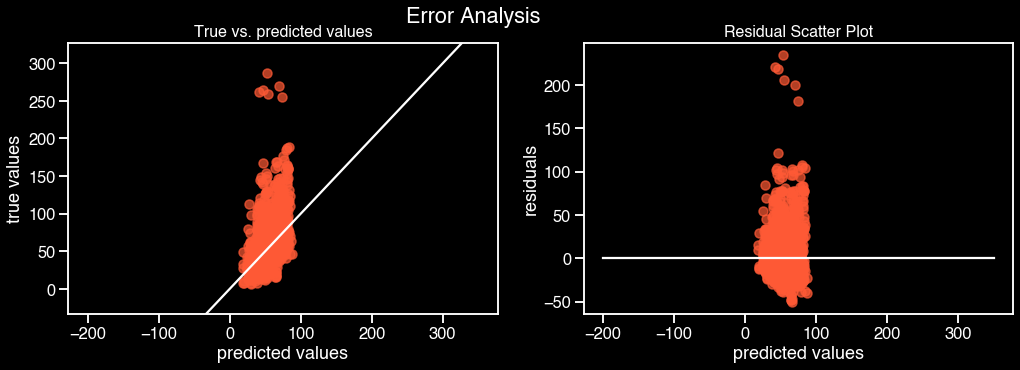

In [19]:
# Instantiate our model 
lin_log_reg = LinearRegression()

# Train the model using our data
lin_log_reg.fit(X_train, y_log) # y´= log(y+1)

# predict

y_pred_train_log = lin_log_reg.predict(X_train) # y = exp(y´) - 1
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test_log = lin_log_reg.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)


rsme_lin_log_reg_train = rmse(y_train, y_pred_train )
rsme_lin_log_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_log_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_log_reg_test:.2f}')

# error analysis test:
error_analysis(y_test, y_pred_test)

# linear regression with polynomial features


In [20]:

# import to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=2, 
                        interaction_only=True,
                        include_bias=False)
x_poly_train = polynomial_features.fit_transform(X_train)   # shape (20,2) # x , x2
x_poly_test = polynomial_features.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)
y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

RSME _ train: 19.01
RSME _ test: 25.24
train
test


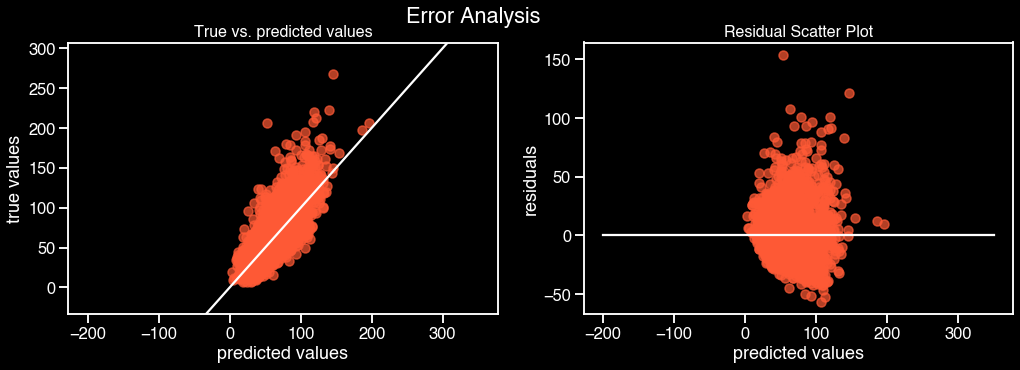

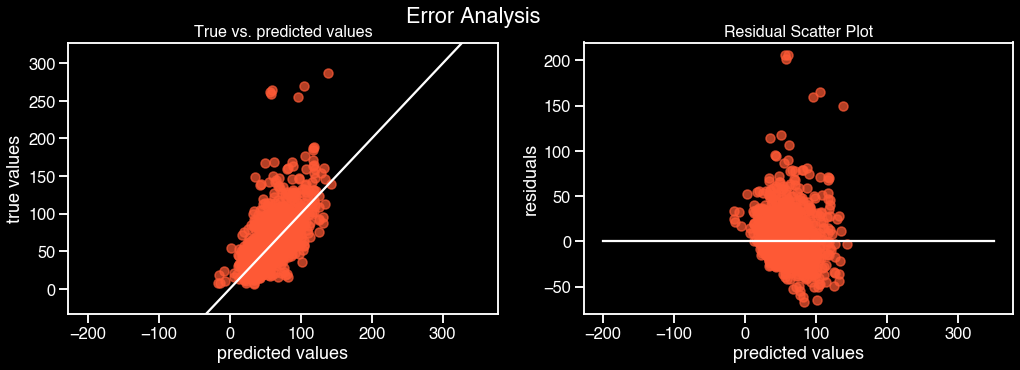

In [21]:

rsme_poly2_train = rmse(y_train, y_pred_train)
rsme_poly2_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_poly2_train:.2f}')
print(f'RSME _ test: {rsme_poly2_test:.2f}')

# error analysis train
print('train')
error_analysis(y_train, y_pred_train)
print('test')
error_analysis(y_test, y_pred_test)

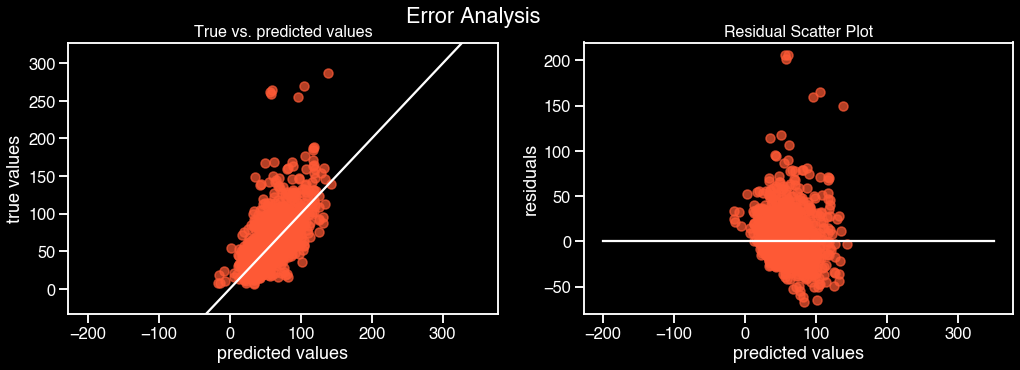

In [22]:
error_analysis(y_test, y_pred_test)

In [23]:

# import to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=3, 
                        interaction_only=True,
                        include_bias=False)
x_poly_train = polynomial_features.fit_transform(X_train)   # shape (20,2) # x , x2
x_poly_test = polynomial_features.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)
y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

RSME _ train: 0.22
RSME _ test: 677.94


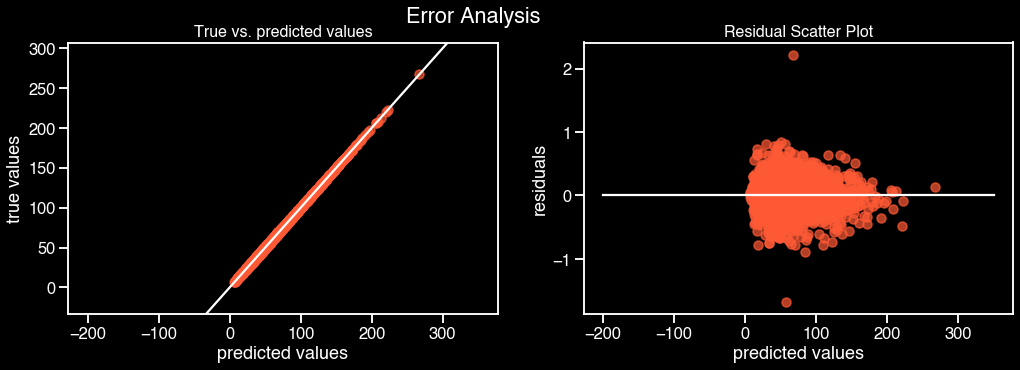

In [24]:
rsme_poly3_train = rmse(y_train, y_pred_train)
rsme_poly3_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_poly3_train:.2f}')
print(f'RSME _ test: {rsme_poly3_test:.2f}')

# error analysis train
error_analysis(y_train, y_pred_train)

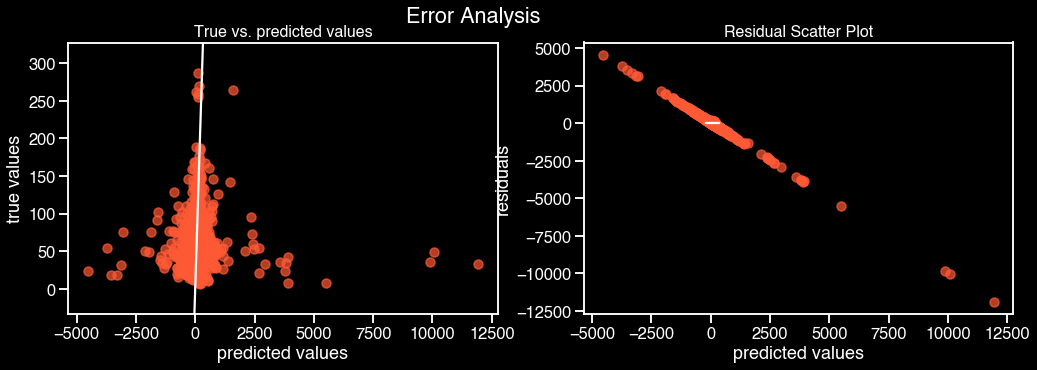

In [25]:
error_analysis(y_test, y_pred_test)

### Linear regression with polynomic features 2 degree and penalisation (lasso) 

In [26]:
# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly_train = polynomial_features.fit_transform(X_train)   # shape (20,2) # x , x2
x_poly_test = polynomial_features.transform(X_test)

model_poly = Lasso()
model_poly.fit(x_poly_train, y_train)
y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.008e+05, tolerance: 3.066e+02
  model = cd_fast.enet_coordinate_descent(


RSME _ train: 22.42
RSME _ test: 25.30


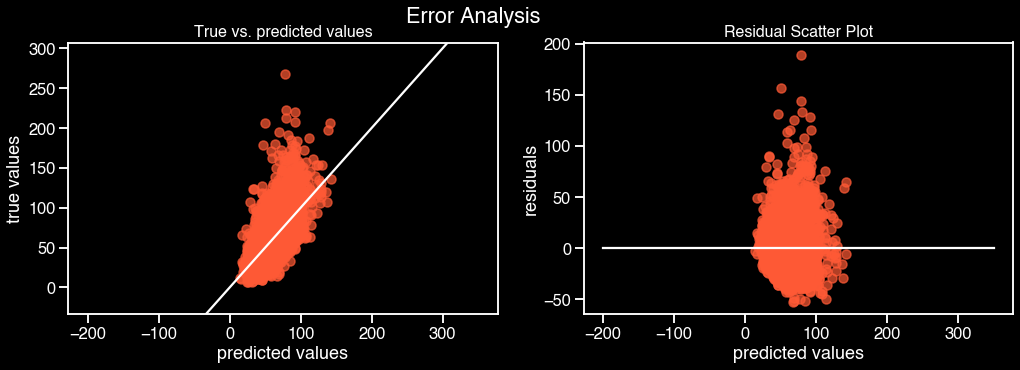

In [27]:

rsme_poly2_l_train = rmse(y_train, y_pred_train)
rsme_poly2_l_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_poly2_l_train:.2f}')
print(f'RSME _ test: {rsme_poly2_l_test:.2f}')

# error analysis train:hh
error_analysis(y_train, y_pred_train)